In [1]:
import networkx as nx
from thewalrus import hafnian
import numpy as np
import random 
import matplotlib.pyplot as plt
from tqdm import tqdm

# 设置全局字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({"font.size": 16})

# 启用 LaTeX 渲染
plt.rcParams["text.usetex"] = True
# Number of vertexes
n = 256
p = 0.4

# 创建 Erods-Renyi Graph
G3 = nx.erdos_renyi_graph(n, p, seed=7)

np.save(f'./Data/G3.npy', nx.to_numpy_array(G3))
# G3 = nx.from_numpy_array(np.load(f'./Data/G3.npy'))

# 为每条边赋予随机的复数权重
# np.random.seed(7)
# for (u, v) in G3.edges():
#     real_part = np.random.uniform(-1, 1)   # 随机实部
#     imag_part = np.random.uniform(-1, 1)   # 随机虚部
#     G3[u][v]['weight'] = complex(real_part, imag_part)

from Glauber_hafnian import *

print(calculate_density(G3))

51.5


In [ ]:
# Plot the hafnian score advantage versus click number
G = G3
c = 0.6 # fugacity
iteration = 100
mixing_time = 1000
click_number_list = [16, 18, 20, 22, 24, 26, 28]

plt.figure(figsize=(10, 6), dpi=300)
for k in click_number_list:
    best_hafnian = np.zeros(10)
    double_loop_glauber_best_hafnian = np.zeros(10)
    for i in tqdm(range(10)):
        _, _, best_hafnian[i] = random_search(G, k, iteration)
        _, _, double_loop_glauber_best_hafnian[i] = double_loop_glauber_random_search(G, k, c, iteration, mixing_time)
    score_advantage = double_loop_glauber_best_hafnian / best_hafnian
    np.save(f"./Data/G3/hafnian_score_advantage_{k}.npy", score_advantage)
    mean = np.mean(score_advantage, axis=0)
    std = np.std(score_advantage, axis=0)
    plt.errorbar(k, mean, yerr = std, fmt='o', color='C0', ecolor='C0', capsize=5)
    
plt.xlabel('Click number')
plt.ylabel('Hafnian \n Score advantage')
plt.title('Hafnian score advantage vs. click number')
plt.savefig('./Figure/hafnian_score_advantage.pdf')
plt.show()

 30%|███       | 3/10 [1:18:11<3:05:45, 1592.18s/it]

In [4]:
double_loop_glauber_dynamics(G, k, c, mixing_time)

100%|██████████| 10/10 [19:25<00:00, 116.54s/it]


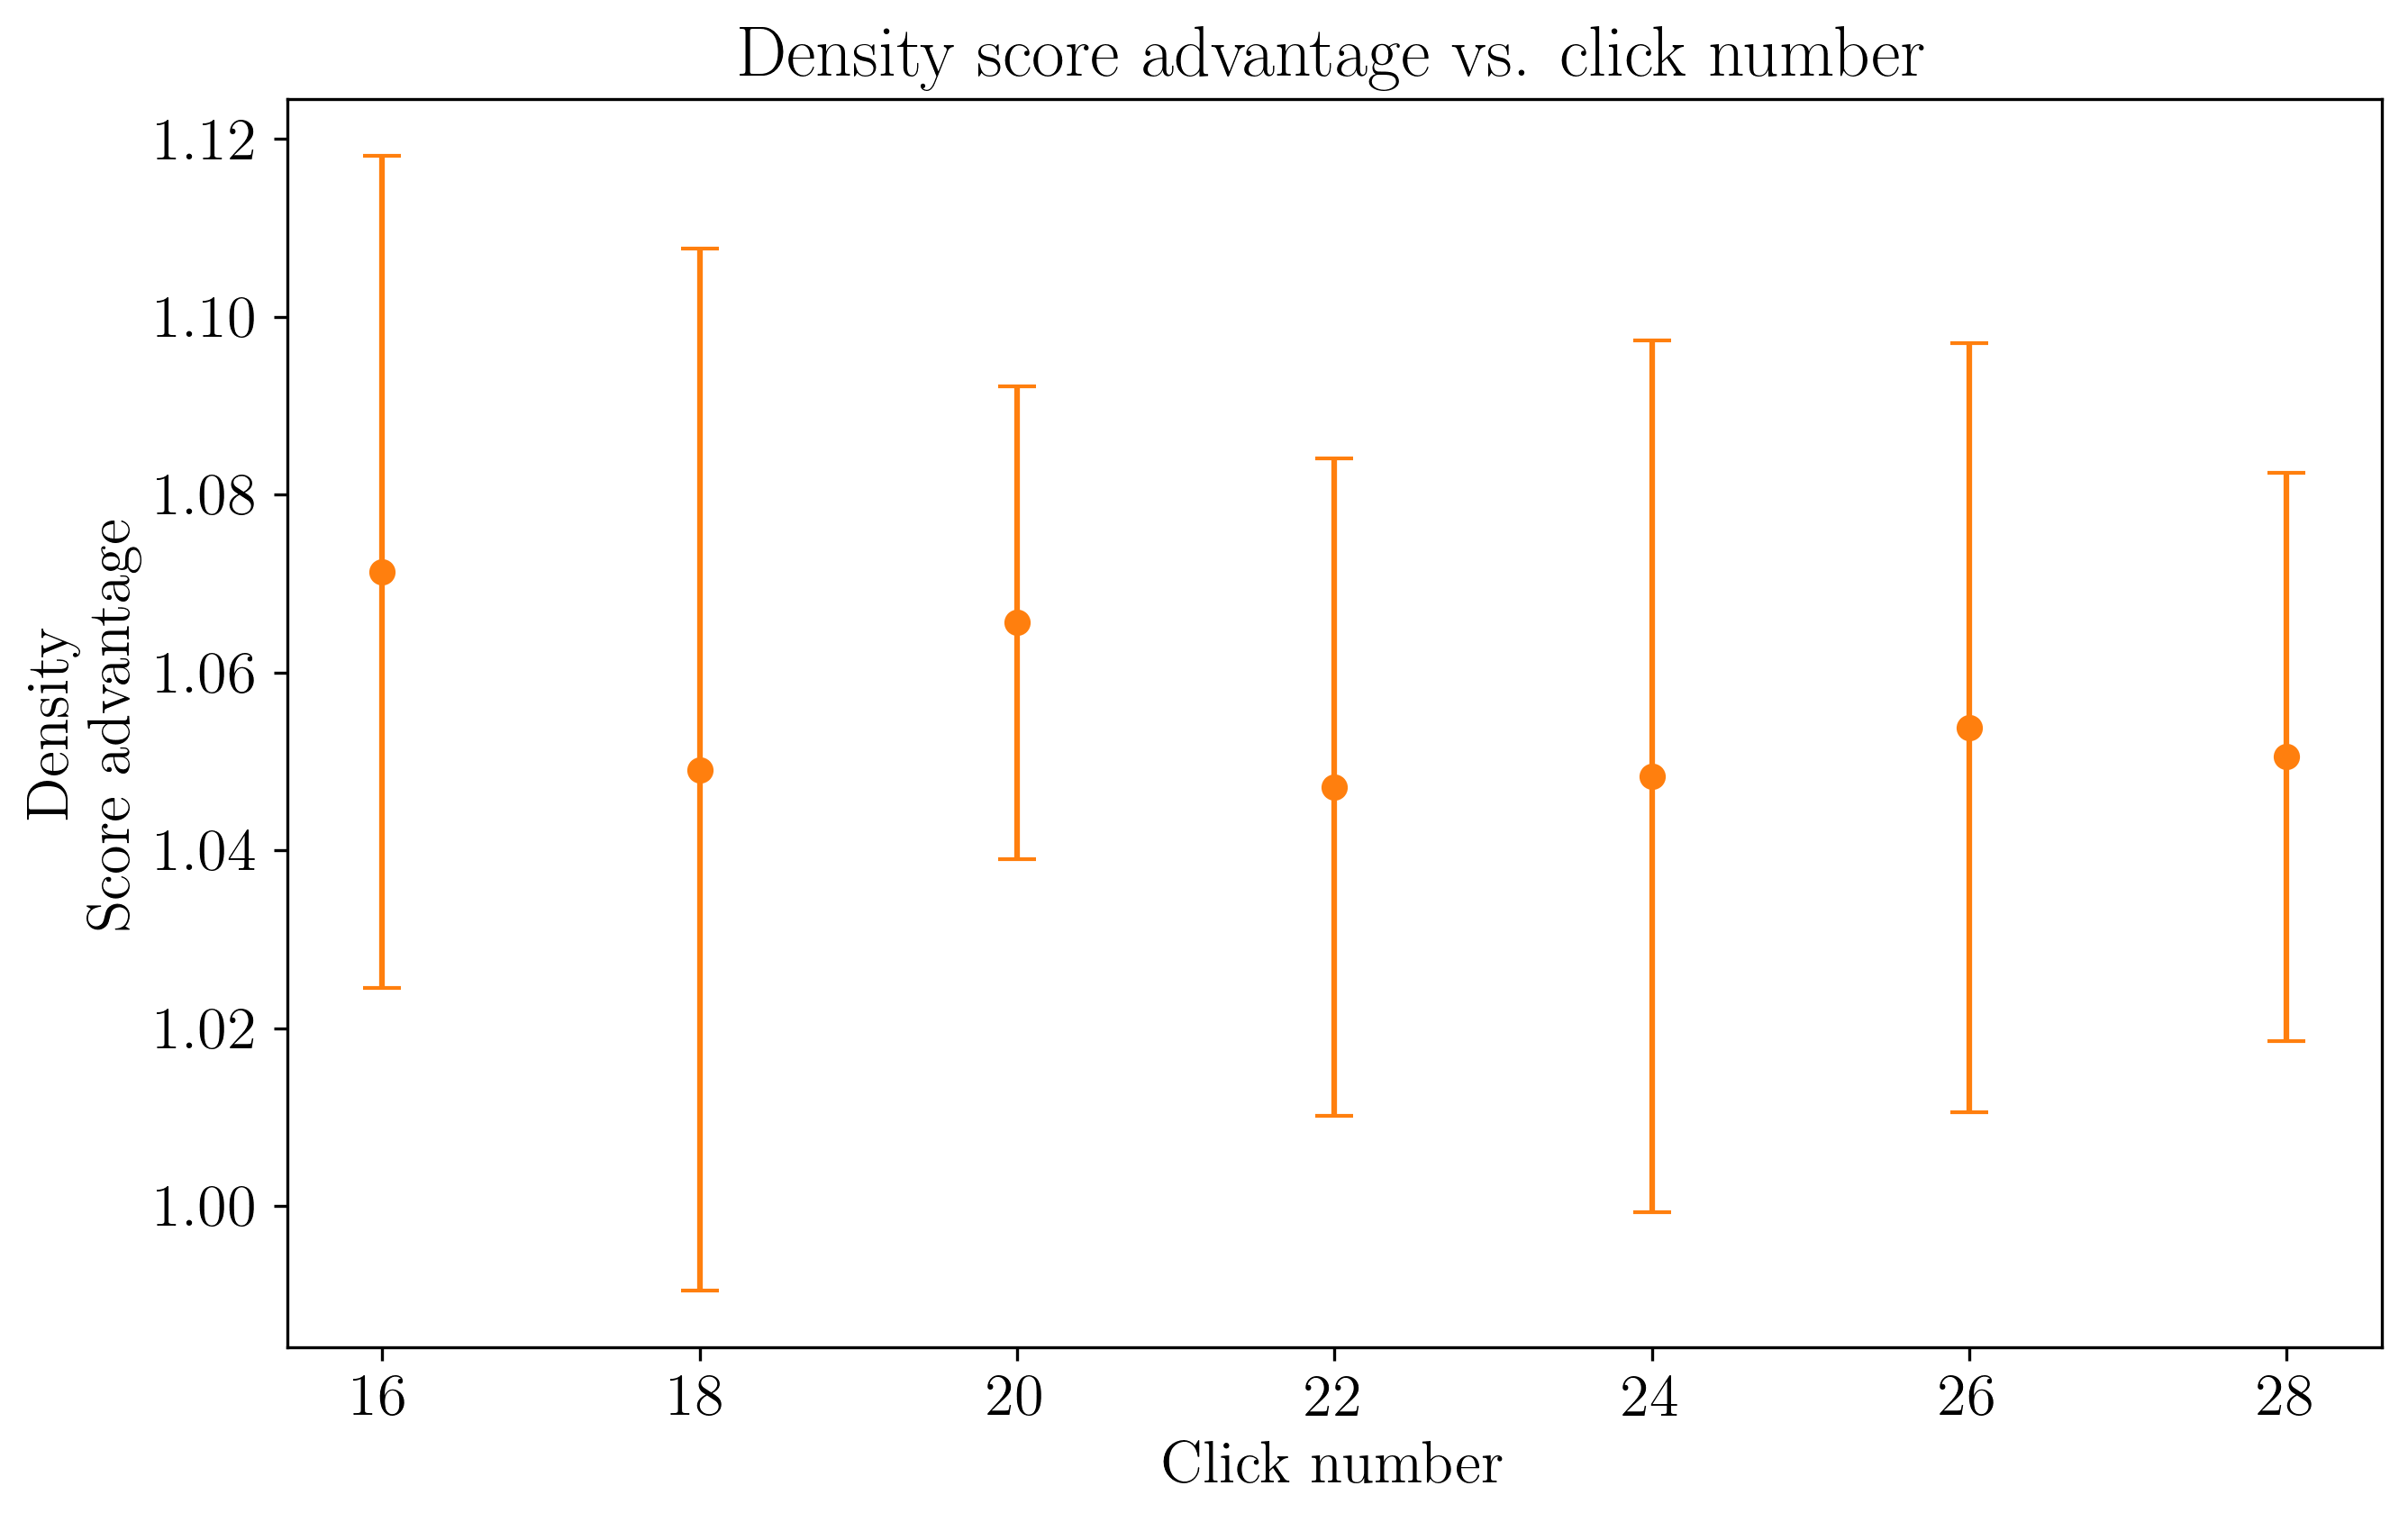

In [ ]:
# Plot the density score advantage versus click number
from Glauber_density import *

G = G3
c = 0.6
iteration = 100
mixing_time = 1000
click_number_list = [16, 18, 20, 22, 24, 26, 28]

plt.figure(figsize=(10, 6), dpi=300)
for k in click_number_list:
    best_density = np.zeros(10)
    double_loop_glauber_best_density = np.zeros(10)
    for i in tqdm(range(10)):
        _, _, best_density[i] = random_search(G, k, iteration)
        _, _, double_loop_glauber_best_density[i] = double_loop_glauber_random_search(G, k, c, iteration, mixing_time)
    score_advantage = double_loop_glauber_best_density / best_density
    np.save(f"./Data/G3/density_score_advantage_{k}.npy", score_advantage)
    mean = np.mean(score_advantage, axis=0)
    std = np.std(score_advantage, axis=0)
    plt.errorbar(k, mean, yerr = std, fmt='o', color='C1', ecolor='C1', capsize=5)
    
plt.xlabel('Click number')
plt.ylabel('Density \n Score advantage')
plt.title('Density score advantage vs. click number')
plt.savefig('./Figure/density_score_advantage.pdf')
plt.show()

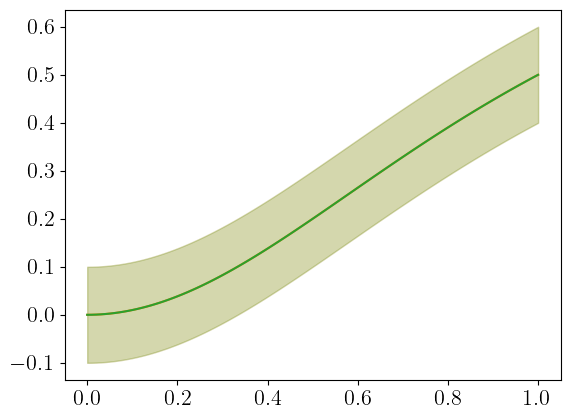

In [7]:
x = np.linspace(0, 1, 100)

plt.plot(x, x**2 / (1 + x**2), color='C1', label='Glauber Dynamics')
plt.fill_between(x, x**2 / (1 + x**2) - 0.1, x**2 / (1 + x**2) + 0.1, color='C1', alpha=0.2)
plt.plot(x, x**2 / (1 + x**2), color='C2', label='Modified Glauber Dynamics')
plt.fill_between(x, x**2 / (1 + x**2) - 0.1, x**2 / (1 + x**2) + 0.1, color='C2', alpha=0.2)